# Statistic the gene count and read count for each reference sequences

    Chrom
    Length
    Gene
    mRNA
    lncRNA
    Other
    Reads

In [132]:
import yaml
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pyBioInfo.IO.File import GtfFile, GtfTranscriptBuilder
rcParams["font.family"] = "arial"

In [87]:
dat = pd.read_csv("data/genome/genome.sizes", sep="\t", index_col=0, header=None)
dat.index.name = "Chrom"
dat.columns = ["Length"]
dat

,Length
Chrom,
NW_019174256.1,109
NW_019174257.1,12271234
NW_019174258.1,19189006
NW_019174259.1,1556
NW_019174260.1,11810
...,...
NW_019208907.1,342
NW_019208908.1,103
NW_019208909.1,116


In [8]:
with GtfFile("data/genome/annotation.gtf") as f:
    records = [x for x in f]
len(records)

824213

In [9]:
transcripts = list(GtfTranscriptBuilder(records))
len(transcripts)

35307

In [88]:
rows = []
for transcript in transcripts:
    record = transcript.records["transcript"][0]
    gene_id = record.attributes["gene_id"]
    transcript_id = record.attributes["transcript_id"]
    row = (transcript.chrom, gene_id)
    rows.append(row)
print(len(rows))
rows = set(rows)  
print(len(rows)) 

35307
24214


In [89]:
counter = Counter([row[0] for row in rows])
values = [counter[x] for x in dat.index]
dat["Gene"] = values

In [90]:
rows = []
for transcript in transcripts:
    record = transcript.records["transcript"][0]
    gene_id = record.attributes["gene_id"]
    transcript_id = record.attributes["transcript_id"]
    gene_biotype = record.attributes["gene_biotype"]
    if gene_biotype == "protein_coding":
        row = (transcript.chrom, gene_id)
        rows.append(row)
print(len(rows))
rows = set(rows)  
print(len(rows)) 

33024
22018


In [91]:
counter = Counter([row[0] for row in rows])
values = [counter[x] for x in dat.index]
dat["mRNA"] = values

In [92]:
rows = []
for transcript in transcripts:
    record = transcript.records["transcript"][0]
    gene_id = record.attributes["gene_id"]
    transcript_id = record.attributes["transcript_id"]
    gene_biotype = record.attributes["gene_biotype"]
    if gene_biotype == "lncRNA":
        row = (transcript.chrom, gene_id)
        rows.append(row)
print(len(rows))
rows = set(rows)  
print(len(rows)) 

745
658


In [93]:
counter = Counter([row[0] for row in rows])
values = [counter[x] for x in dat.index]
dat["lncRNA"] = values

In [94]:
rows = []
for transcript in transcripts:
    record = transcript.records["transcript"][0]
    gene_id = record.attributes["gene_id"]
    transcript_id = record.attributes["transcript_id"]
    gene_biotype = record.attributes["gene_biotype"]
    if gene_biotype != "lncRNA" and gene_biotype != "protein_coding":
        row = (transcript.chrom, gene_id)
        rows.append(row)
print(len(rows))
rows = set(rows)  
print(len(rows)) 

1538
1538


In [95]:
counter = Counter([row[0] for row in rows])
values = [counter[x] for x in dat.index]
dat["Other"] = values

In [96]:
dat

,Length,Gene,mRNA,lncRNA,Other
Chrom,,,,,
NW_019174256.1,109,0,0,0,0
NW_019174257.1,12271234,368,344,14,10
NW_019174258.1,19189006,462,432,9,21
NW_019174259.1,1556,0,0,0,0
NW_019174260.1,11810,0,0,0,0
...,...,...,...,...,...
NW_019208907.1,342,0,0,0,0
NW_019208908.1,103,0,0,0,0
NW_019208909.1,116,0,0,0,0


In [32]:
with open("config.yaml") as f:
    samples = yaml.load(f, Loader=yaml.BaseLoader)["samples"]
print(samples)

['Ju_Br_Mi_1', 'Ju_Br_Mi_2', 'Ju_Ey_Mi_1', 'Ju_Ey_Mi_2', 'Ju_Gi_Mi_1', 'Ju_Gi_Mi_2', 'Ju_Go_Mi_1', 'Ju_Go_Mi_2', 'Ju_He_Mi_1', 'Ju_He_Mi_2', 'Ju_Ki_Mi_1', 'Ju_Ki_Mi_2', 'Ju_Li_Mi_1', 'Ju_Li_Mi_2', 'Ju_In_Mi_1', 'Ju_In_Mi_2', 'Ju_Mu_Mi_1', 'Ju_Mu_Mi_2', 'Ad_Br_Ma_1', 'Ad_Br_Ma_2', 'Ad_Br_Fe_1', 'Ad_Br_Fe_2', 'Ad_Ey_Ma_1', 'Ad_Ey_Ma_2', 'Ad_Ey_Fe_1', 'Ad_Ey_Fe_2', 'Ad_Gi_Ma_1', 'Ad_Gi_Ma_2', 'Ad_Gi_Fe_1', 'Ad_Gi_Fe_2', 'Ad_Go_Ma_1', 'Ad_Go_Ma_2', 'Ad_Go_Fe_1', 'Ad_Go_Fe_2', 'Ad_He_Ma_1', 'Ad_He_Ma_2', 'Ad_He_Fe_1', 'Ad_He_Fe_2', 'Ad_Ki_Ma_1', 'Ad_Ki_Ma_2', 'Ad_Ki_Fe_1', 'Ad_Ki_Fe_2', 'Ad_Li_Ma_1', 'Ad_Li_Ma_2', 'Ad_Li_Fe_1', 'Ad_Li_Fe_2', 'Ad_Mu_Ma_1', 'Ad_Mu_Ma_2', 'Ad_Mu_Fe_1', 'Ad_Mu_Fe_2', 'Ad_In_Ma_1', 'Ad_In_Ma_2', 'Ad_In_Fe_1', 'Ad_In_Fe_2', 'Ad_Pi_Ma_1', 'Ad_Pi_Ma_2', 'Ad_Pi_Fe_1', 'Ad_Pi_Fe_2', 'Ad_Sp_Ma_1', 'Ad_Sp_Ma_2', 'Ad_Sp_Fe_1', 'Ad_Sp_Fe_2', 'Ad_St_Ma_1', 'Ad_St_Ma_2', 'Ad_St_Fe_1', 'Ad_St_Fe_2']


In [64]:
array = []
for sample in samples:
    path = "results/mapping/filtered/%s.chrom_read_count.txt" % sample
    d = pd.read_csv(path, sep="\t", index_col=0, header=None)
    d.index.name = "Chrom"
    d.columns = [sample]
    array.append(d)
    # break
print(len(array))

66


In [55]:
tmp = pd.concat(array, axis=1, join="outer")
tmp = tmp.fillna(0)
tmp

,Ju_Br_Mi_1,Ju_Br_Mi_2,Ju_Ey_Mi_1,Ju_Ey_Mi_2,Ju_Gi_Mi_1,Ju_Gi_Mi_2,Ju_Go_Mi_1,Ju_Go_Mi_2,Ju_He_Mi_1,Ju_He_Mi_2,...,Ad_Pi_Fe_1,Ad_Pi_Fe_2,Ad_Sp_Ma_1,Ad_Sp_Ma_2,Ad_Sp_Fe_1,Ad_Sp_Fe_2,Ad_St_Ma_1,Ad_St_Ma_2,Ad_St_Fe_1,Ad_St_Fe_2
NC_016870.1,2396156.0,2426136.0,440346.0,449732.0,772676.0,681904.0,545474.0,553130.0,3753654.0,3809358.0,...,638716.0,624880.0,478214.0,468552.0,483838.0,511230.0,1189242.0,1064776.0,781806.0,918966.0
NW_019174257.1,1059412.0,1139854.0,789582.0,797936.0,1100546.0,1147292.0,1133606.0,1308390.0,817342.0,980638.0,...,1045212.0,982064.0,1375046.0,1423764.0,1559214.0,1563126.0,549394.0,509998.0,443504.0,634964.0
NW_019174258.1,1394212.0,1515968.0,943478.0,726872.0,1310658.0,1299484.0,1305748.0,1427906.0,1296986.0,1207386.0,...,1331760.0,1245266.0,1363860.0,1520078.0,1569164.0,1602966.0,629628.0,601714.0,565150.0,834844.0
NW_019174259.1,10.0,10.0,6.0,14.0,6.0,12.0,12.0,24.0,4.0,14.0,...,6.0,2.0,0.0,0.0,0.0,0.0,6.0,2.0,10.0,2.0
NW_019174260.1,4.0,0.0,0.0,4.0,4.0,2.0,26.0,36.0,0.0,4.0,...,32.0,24.0,0.0,4.0,16.0,26.0,10.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NW_019195791.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
NW_019197954.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
NW_019200393.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
NW_019206861.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [97]:
values = tmp.sum(axis=1)

In [98]:
counter = defaultdict(int)
for index, value in zip(values.index, values):
    counter[index] = int(value)

In [99]:
dat["Read"] = [counter[chrom] for chrom in dat.index]

In [100]:
dat

,Length,Gene,mRNA,lncRNA,Other,Read
Chrom,,,,,,
NW_019174256.1,109,0,0,0,0,0
NW_019174257.1,12271234,368,344,14,10,77905664
NW_019174258.1,19189006,462,432,9,21,120868456
NW_019174259.1,1556,0,0,0,0,904
NW_019174260.1,11810,0,0,0,0,616
...,...,...,...,...,...,...
NW_019208907.1,342,0,0,0,0,0
NW_019208908.1,103,0,0,0,0,0
NW_019208909.1,116,0,0,0,0,0


In [104]:
dat["GeneDensity"] = dat["Gene"] * 1e6 / dat["Length"]
dat["ReadDensity"] = dat["Read"] / dat["Length"]
dat["ReadRatio"] = dat["Read"] * 100 / sum(dat["Read"])

In [133]:
dat.to_csv("genome.chrom.summary.tsv", sep="\t")

In [121]:
d1 = dat[(dat["GeneDensity"] != 0) & (dat["ReadDensity"] != 0)]
d2 = dat[(dat["GeneDensity"] != 0) & (dat["ReadDensity"] == 0)]
d3 = dat[(dat["GeneDensity"] == 0) & (dat["ReadDensity"] != 0)]
d4 = dat[(dat["GeneDensity"] == 0) & (dat["ReadDensity"] == 0)]
print("Gene: +, Read: +, Count: %d" % len(d1))
print("Gene: +, Read: -, Count: %d" % len(d2))
print("Gene: -, Read: +, Count: %d" % len(d3))
print("Gene: -, Read: -, Count: %d" % len(d4))

Gene: +, Read: +, Count: 517
Gene: +, Read: -, Count: 28
Gene: -, Read: +, Count: 7368
Gene: -, Read: -, Count: 26743


In [136]:
dat

,Length,Gene,mRNA,lncRNA,Other,Read,GeneDensity,ReadDensity,ReadRatio
Chrom,,,,,,,,,
NW_019174256.1,109,0,0,0,0,0,0.000000,0.000000,0.000000
NW_019174257.1,12271234,368,344,14,10,77905664,29.988834,6.348641,1.195790
NW_019174258.1,19189006,462,432,9,21,120868456,24.076286,6.298839,1.855234
NW_019174259.1,1556,0,0,0,0,904,0.000000,0.580977,0.000014
NW_019174260.1,11810,0,0,0,0,616,0.000000,0.052159,0.000009
...,...,...,...,...,...,...,...,...,...
NW_019208907.1,342,0,0,0,0,0,0.000000,0.000000,0.000000
NW_019208908.1,103,0,0,0,0,0,0.000000,0.000000,0.000000
NW_019208909.1,116,0,0,0,0,0,0.000000,0.000000,0.000000


In [153]:
tmp = dat.sort_values(by="Length", ascending=False)[:30]
tmp.head()

,Length,Gene,mRNA,lncRNA,Other,Read,GeneDensity,ReadDensity,ReadRatio
Chrom,,,,,,,,,
NW_019174404.1,24919768,911,822,19,70,156707020,36.557323,6.288462,2.405328
NW_019174280.1,23673729,796,737,24,35,182450210,33.623769,7.706864,2.800465
NW_019174307.1,23266897,819,790,10,19,189776768,35.200225,8.156514,2.912922
NW_019174393.1,20917920,610,519,15,76,130955872,29.161599,6.260463,2.010068
NW_019174323.1,19971353,879,807,19,53,340374972,44.013042,17.043160,5.224484


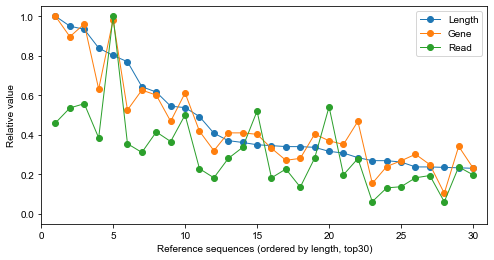

In [170]:
xs = np.arange(len(tmp)) + 1
ys1 = tmp["Length"]
ys1 = ys1 / max(ys1)
ys2 = tmp["mRNA"]
ys2 = ys2 / max(ys2)
ys3 = tmp["Read"]
ys3 = ys3 / max(ys3)

plt.figure(figsize=(8, 4))
plt.plot(xs, ys1, marker="o", lw=1, label="Length")
plt.plot(xs, ys2, marker="o", lw=1, label="Gene")
plt.plot(xs, ys3, marker="o", lw=1, label="Read")
plt.xlabel("Reference sequences (ordered by length, top30)")
plt.ylabel("Relative value")
plt.xlim(xs[0] - 1, xs[-1] + 1)
plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()
plt.tight_layout()
plt.close()